Continuing on where I left off analyzing oil spill data... (see previous notebook for data exploration; this one will focus on mapping)

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('LA_spills_rev.csv')
df

,IYEAR,LOCATION_LATITUDE,LOCATION_LONGITUDE,UNINTENTIONAL_RELEASE_BBLS,RECOVERED_BBLS,EST_COST_OPER_PAID,EST_COST_GAS_RELEASED,EST_COST_PROP_DAMAGE,EST_COST_EMERGENCY,EST_COST_ENVIRONMENTAL,EST_COST_OTHER,TOTAL_DAMAGE_COSTS,COSTPAID_ofTOTAL
0,2013,33.949629,-118.370221,10.00,5.00,0,1000,96278,2861558,130033,18256,3106125,0.000
1,2017,33.757825,-118.111294,100.00,100.00,0,6273,54752,75822,0,0,130574,0.000
2,2016,33.758661,-118.203322,2.98,2.98,0,120,7000,3000,0,0,10000,0.000
3,2016,33.764961,-118.209047,0.50,0.50,0,15,1000,3000,0,0,4000,0.000
4,2015,33.804707,-118.222597,264.00,56.00,0,27720,0,0,267152,0,267152,0.000
5,2014,33.806106,-118.158872,5.00,5.00,25000,500,50000,150000,50000,10000,260000,0.096
6,2014,33.806917,-118.227056,989.00,600.00,0,49014,0,150986,0,0,150986,0.000
7,2014,34.044058,-118.441362,15.00,12.00,0,300,175000,38000,19200,0,232200,0.000
8,2012,34.005510,-118.144770,0.60,0.40,0,48,8000,5000,1000,2500,16500,0.000
9,2011,33.846624,-118.252704,1.00,1.00,0,0,160000,50000,40000,0,250000,0.000


In [3]:
df.columns.to_list()

['IYEAR',
 'LOCATION_LATITUDE',
 'LOCATION_LONGITUDE',
 'UNINTENTIONAL_RELEASE_BBLS',
 'RECOVERED_BBLS',
 'EST_COST_OPER_PAID',
 'EST_COST_GAS_RELEASED',
 'EST_COST_PROP_DAMAGE',
 'EST_COST_EMERGENCY',
 'EST_COST_ENVIRONMENTAL',
 'EST_COST_OTHER',
 'TOTAL_DAMAGE_COSTS',
 'COSTPAID_ofTOTAL']

In [4]:
df.columns = ['YEAR',
 'Lat',
 'Long',
 'Barrels',
 'Barrels_recovered',
 'EST_COST_OPER_PAID',
 'EST_COST_GAS_RELEASED',
 'EST_COST_PROP_DAMAGE',
 'EST_COST_EMERGENCY',
 'EST_COST_ENVIRONMENTAL',
 'EST_COST_OTHER',
 'TOTAL_DAMAGE_COSTS',
 'percent_covered']

In [5]:
gdf = gpd.GeoDataFrame(df, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df.Long, df.Lat))
gdf

,YEAR,Lat,Long,Barrels,Barrels_recovered,EST_COST_OPER_PAID,EST_COST_GAS_RELEASED,EST_COST_PROP_DAMAGE,EST_COST_EMERGENCY,EST_COST_ENVIRONMENTAL,EST_COST_OTHER,TOTAL_DAMAGE_COSTS,percent_covered,geometry
0,2013,33.949629,-118.370221,10.00,5.00,0,1000,96278,2861558,130033,18256,3106125,0.000,POINT (-118.37022 33.94963)
1,2017,33.757825,-118.111294,100.00,100.00,0,6273,54752,75822,0,0,130574,0.000,POINT (-118.11129 33.75782)
2,2016,33.758661,-118.203322,2.98,2.98,0,120,7000,3000,0,0,10000,0.000,POINT (-118.20332 33.75866)
3,2016,33.764961,-118.209047,0.50,0.50,0,15,1000,3000,0,0,4000,0.000,POINT (-118.20905 33.76496)
4,2015,33.804707,-118.222597,264.00,56.00,0,27720,0,0,267152,0,267152,0.000,POINT (-118.22260 33.80471)
5,2014,33.806106,-118.158872,5.00,5.00,25000,500,50000,150000,50000,10000,260000,0.096,POINT (-118.15887 33.80611)
6,2014,33.806917,-118.227056,989.00,600.00,0,49014,0,150986,0,0,150986,0.000,POINT (-118.22706 33.80692)
7,2014,34.044058,-118.441362,15.00,12.00,0,300,175000,38000,19200,0,232200,0.000,POINT (-118.44136 34.04406)
8,2012,34.005510,-118.144770,0.60,0.40,0,48,8000,5000,1000,2500,16500,0.000,POINT (-118.14477 34.00551)
9,2011,33.846624,-118.252704,1.00,1.00,0,0,160000,50000,40000,0,250000,0.000,POINT (-118.25270 33.84662)


In [6]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
gdf_web_mercator = gdf.to_crs(epsg=3857)

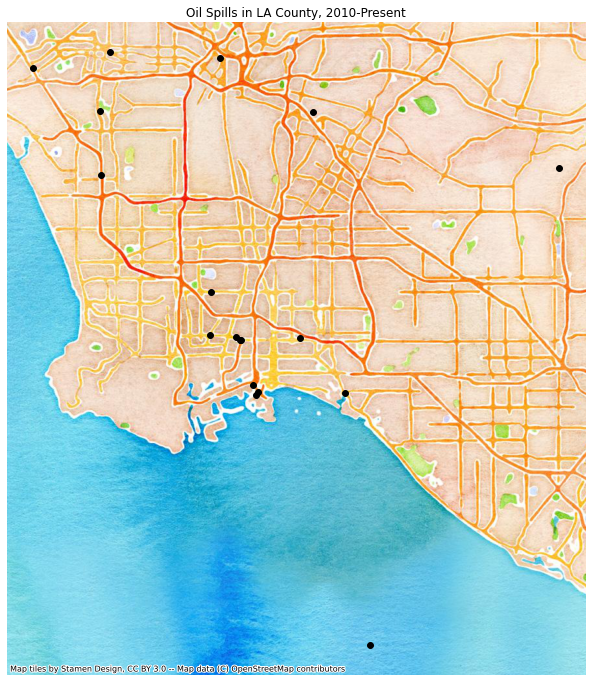

In [8]:
# map it
fig, ax = plt.subplots(figsize=(12,12))

gdf_web_mercator.plot(ax=ax, 
                      marker='o',
                      markersize=35,
                      color='black')

ax.axis('off')

ax.set_title('Oil Spills in LA County, 2010-Present')

ctx.add_basemap(ax, source=ctx.providers.Stamen.Watercolor)


In [9]:
# let's map with markers scaled to the amount of oil released

# first we'll have to pull the values we're correlating the marker size to

barrels = gdf['Barrels'].tolist()
barrels

[10.0,
 100.0,
 2.98,
 0.5,
 264.0,
 5.0,
 989.0,
 15.0,
 0.6,
 1.0,
 1.0,
 1.0,
 9.0,
 18.0,
 1.0,
 0.12,
 0.5,
 0.48]

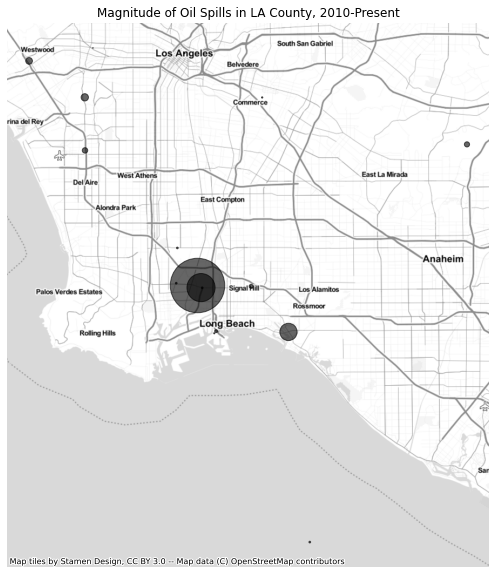

In [17]:
# now we can modify the markersize field with a function based on that list

# we'll also increase the transparency a bit with the alpha field to make the map more legible

fig, ax = plt.subplots(figsize=(10,10))

gdf_web_mercator.plot(ax=ax, 
                      marker='o',
                      markersize=[3*n for n in (barrels)],
                      color='black',
                      alpha=0.6)

ax.axis('off')

ax.set_title('Magnitude of Oil Spills in LA County, 2010-Present')

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

In [11]:
# We can do this with any other field too by repeating the last two steps.

# Let's check out markers scaled to the total damage costs

totalcosts = gdf['TOTAL_DAMAGE_COSTS'].tolist()
totalcosts

[3106125,
 130574,
 10000,
 4000,
 267152,
 260000,
 150986,
 232200,
 16500,
 250000,
 36000,
 4500000,
 13000,
 6500,
 135500,
 185000,
 73000,
 26000]

In [12]:
# and the amount that operators paid

costpaid = gdf['EST_COST_OPER_PAID'].tolist()
costpaid

[0, 0, 0, 0, 0, 25000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500, 0, 0]

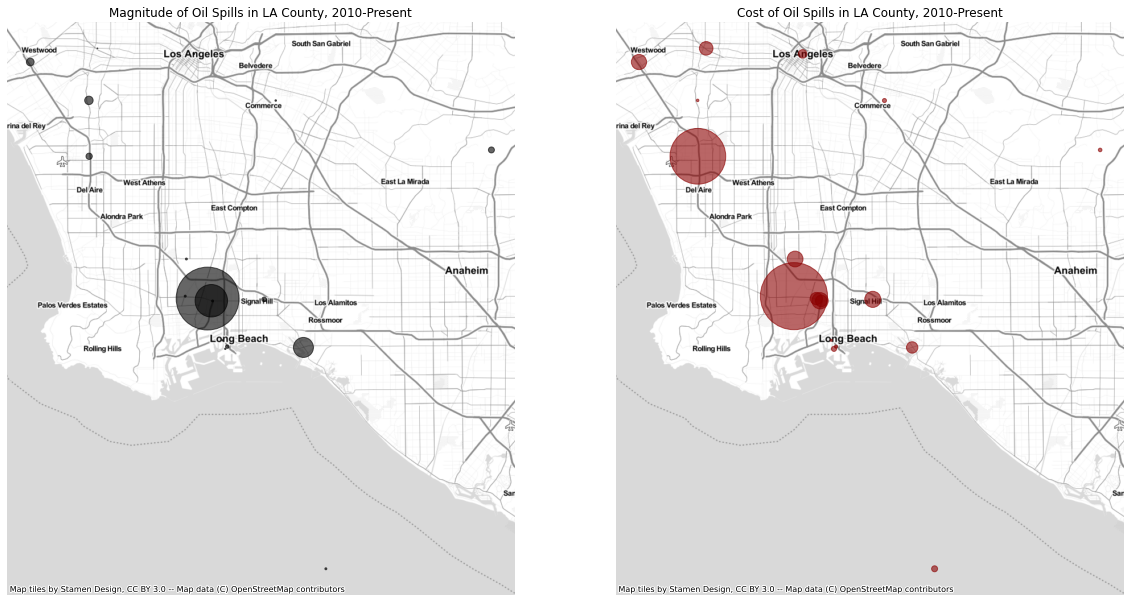

In [25]:
# both maps together
fig, ax = plt.subplots(1,2,figsize=(20,20))

# barrels spilled
gdf_web_mercator.plot(ax=ax[0], 
                      marker='o',
                      markersize=[4*n for n in (barrels)],
                      color='black',
                      alpha=0.6)
ax[0].axis('off')
ax[0].set_title('Magnitude of Oil Spills in LA County, 2010-Present')

ctx.add_basemap(ax[0], source=ctx.providers.Stamen.TonerLite)

# total costs
gdf_web_mercator.plot(ax=ax[1], 
                      marker='o',
                      markersize=[.001*n for n in (totalcosts)],
                      color='darkred',
                      alpha=0.6)
ax[1].axis('off')
ax[1].set_title('Cost of Oil Spills in LA County, 2010-Present')

ctx.add_basemap(ax[1], source=ctx.providers.Stamen.TonerLite)